In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
diabetes=pd.read_csv('diabetes.csv')

In [182]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [183]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [184]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [185]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

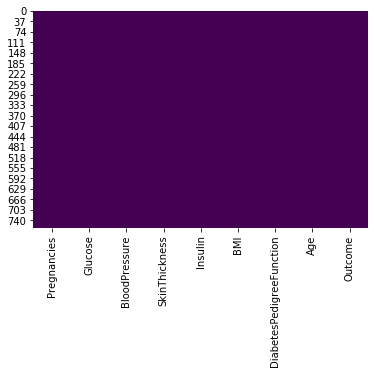

In [186]:
sns.heatmap(diabetes.isnull(),cbar=False,cmap='viridis')

## Build Logistic Regression

In [187]:
X=diabetes.drop(labels=['Outcome'],axis=1)
y=diabetes['Outcome']

In [188]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
X_train.shape

(514, 8)

In [189]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [191]:
df=pd.DataFrame(data=[y_predict,y_test])
df.T

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
249,0,0
250,0,1
251,0,0
252,1,1


In [192]:
from sklearn.metrics import accuracy_score
model.score(X_test,y_test)

0.7480314960629921

## RFE

In [193]:
from sklearn.feature_selection import RFE

In [194]:
rfe=RFE(model,5,verbose=1)
rfe=rfe.fit(X,y)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [195]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [196]:
rfe.support_

array([ True,  True, False, False, False,  True,  True,  True])

In [197]:
XX=X[X.columns[rfe.support_]]
XX.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6,148,33.6,0.627,50
1,1,85,26.6,0.351,31
2,8,183,23.3,0.672,32
3,1,89,28.1,0.167,21
4,0,137,43.1,2.288,33


In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,y,test_size=0.33,random_state=42,stratify=y)


In [199]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [201]:
model.score(X_test,y_test)

0.7362204724409449

## Accuracy, F1_Score,P,R,ROC_AUC

In [202]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [203]:
X_train,X_test,y_train,y_test=train_test_split(XX,y,test_size=0.33,random_state=42,stratify=y)
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(X_train,y_train)

y_predict_prob = model.predict_proba(X_test)[:,1]

[fpr,tpr,thr] = roc_curve(y_test, y_predict_prob)

In [204]:
print('Accuracy: ',accuracy_score(y_test, y_predict))
print('Log loss: ',log_loss(y_test,y_predict))
print('auc: ',auc(fpr,tpr))

Accuracy:  0.7362204724409449
Log loss:  9.110700820451854
auc:  0.8300306435137896


### ROC-AUC curve

In [205]:
idx = np.min(np.where(tpr>0.95))
idx

76

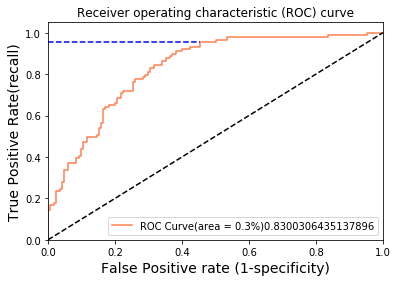

Using a threshold of 0.175 guarantees a sensitivity of 0.955 and a specificity of 0.545, i.e. a false positive rate of 45.45%.


In [206]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = 'ROC Curve(area = 0.3%)' +str(auc(fpr,tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate (1-specificity)', fontsize = 14)
plt.ylabel('True Positive Rate(recall)',fontsize = 14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc = 'lower right')
plt.show()

print('Using a threshold of %.3f ' % thr[idx] + 'guarantees a sensitivity of %.3f '%tpr[idx] + 'and a specificity of %.3f' %(1-fpr[idx]) + 
      ', i.e. a false positive rate of %.2f%%.' %(np.array(fpr[idx])*100))